## Kalman filter text file 

/var/folders/lk/qt3zp1vs2b15lty189sx1bq00000gn/T/ipykernel_6049/2371879539.py:86: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(original_latitudes,original_longitudes,  'b', label='Original Data', color='blue')
/var/folders/lk/qt3zp1vs2b15lty189sx1bq00000gn/T/ipykernel_6049/2371879539.py:87: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot( estimated_latitudes,estimated_longitudes,'r',label='Estimated Data', color='red')


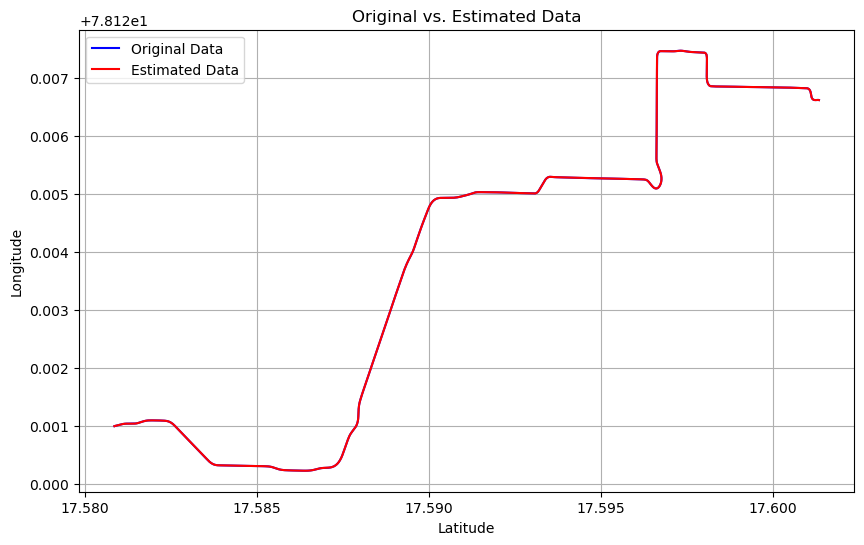

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class KalmanFilter:
    def __init__(self, A, B, H, Q, R, initial_state, initial_covariance):
        self.A = A  # System dynamics matrix
        self.B = B  # Control input matrix
        self.H = H  # Measurement matrix
        self.Q = Q  # Process noise covariance matrix
        self.R = R  # Measurement noise covariance matrix

        self.state = initial_state  # Initial state estimate
        self.covariance = initial_covariance  # Initial covariance estimate

    def predict(self, control_input=None):
        # Predict the next state
        if control_input is not None:
            self.state = np.dot(self.A, self.state) + np.dot(self.B, control_input)
        else:
            self.state = np.dot(self.A, self.state)
        
        # Predict the next covariance
        self.covariance = np.dot(np.dot(self.A, self.covariance), self.A.T) + self.Q

    def update(self, measurement):
        # Kalman gain computation
        S = np.dot(np.dot(self.H, self.covariance), self.H.T) + self.R
        K = np.dot(np.dot(self.covariance, self.H.T), np.linalg.inv(S))

        # Update the state estimate
        innovation = measurement - np.dot(self.H, self.state)
        self.state = self.state + np.dot(K, innovation)

        # Update the covariance estimate
        self.covariance = np.dot((np.eye(self.covariance.shape[0]) - np.dot(K, self.H)), self.covariance)

# Read data from the text file
data = []
with open('/Users/ravitejakunchanapalli/Downloads/sd-maingatetestbed0.05.txt', 'r') as file:
    for line in file:
        values = line.strip().strip('[],').split(',')
        data.append([float(val) for val in values])

# Extract latitude, longitude, and standard deviations
latitudes = [row[0] for row in data]
longitudes = [row[1] for row in data]


# Define system matrices and initial conditions
A = np.eye(2)    #Identity matrix, assuming a simple motion model
B = np.zeros((2, 2))  #No control input
H = np.eye(2)   # Identity matrix as we directly observe position
Q = np.eye(2) * 0.01  #Process noise covariance
R = np.eye(2) * 0.001  # Measurement noise covariance
initial_state = np.array([latitudes[0], longitudes[0]])  # Initial position
initial_covariance = np.eye(2)  # Initial covariance matrix

# Create Kalman filter object
kf = KalmanFilter(A, B, H, Q, R, initial_state, initial_covariance)

# Lists to store original and estimated data
original_latitudes = []
original_longitudes = []
estimated_latitudes = []
estimated_longitudes = []

# Perform filtering for each measurement
for latitude, longitude in zip(latitudes, longitudes):
    measurement = np.array([latitude, longitude])
    kf.predict()
    kf.update(measurement)
    
    # Append original and estimated data
    original_latitudes.append(latitude)
    original_longitudes.append(longitude)
    estimated_latitudes.append(kf.state[0])
    estimated_longitudes.append(kf.state[1])

# Write estimated latitudes and longitudes to a file
with open('/Users/ravitejakunchanapalli/Desktop/KalmanFilter_data.txt', 'w') as file:
    for lat, lon in zip(estimated_latitudes, estimated_longitudes):
        file.write(f"[{lat},{lon}]\n")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(original_latitudes,original_longitudes,  'b', label='Original Data', color='blue')
plt.plot( estimated_latitudes,estimated_longitudes,'r',label='Estimated Data', color='red')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Original vs. Estimated Data')
plt.legend()
plt.grid(True)
plt.show()


## Error calculation

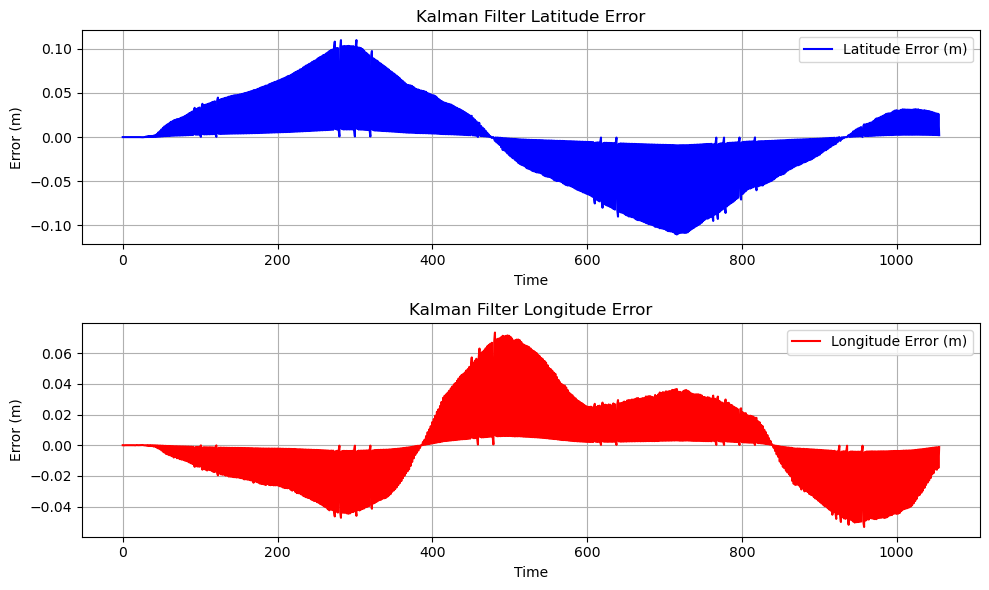

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Function to convert latitude and longitude to meters
def lat_lon_to_meters(lat, lon):
    # Approximate conversion factors for latitude and longitude (for small differences)
    lat_to_m = 111320  # Approximately 111 km per degree latitude
    lon_to_m = 111320  # Approximately 111 km per degree longitude at the equator
    if np.isscalar(lat):
        lat_meters = lat * lat_to_m
    else:
        lat_meters = np.array(lat) * lat_to_m
        
    
    if np.isscalar(lon):
        lon_meters = lon * lon_to_m * np.cos(np.radians(lat))
    else:
        lon_meters = np.array(lon) * lon_to_m * np.cos(np.radians(lat))
    return lat_meters, lon_meters
    
# Function to calculate error in meters
def calculate_error(original, estimated):
    return np.array(original) - np.array(estimated)

class KalmanFilter:
    def __init__(self, A, B, H, Q, R, initial_state, initial_covariance):
        self.A = A  # System dynamics matrix
        self.B = B  # Control input matrix
        self.H = H  # Measurement matrix
        self.Q = Q  # Process noise covariance matrix
        self.R = R  # Measurement noise covariance matrix

        self.state = initial_state  # Initial state estimate
        self.covariance = initial_covariance  # Initial covariance estimate

    def predict(self, control_input=None):
        # Predict the next state
        if control_input is not None:
            self.state = np.dot(self.A, self.state) + np.dot(self.B, control_input)
        else:
            self.state = np.dot(self.A, self.state)
        
        # Predict the next covariance
        self.covariance = np.dot(np.dot(self.A, self.covariance), self.A.T) + self.Q

    def update(self, measurement):
        # Kalman gain computation
        S = np.dot(np.dot(self.H, self.covariance), self.H.T) + self.R
        K = np.dot(np.dot(self.covariance, self.H.T), np.linalg.inv(S))

        # Update the state estimate
        innovation = measurement - np.dot(self.H, self.state)
        self.state = self.state + np.dot(K, innovation)

        # Update the covariance estimate
        self.covariance = np.dot((np.eye(self.covariance.shape[0]) - np.dot(K, self.H)), self.covariance)

# Read data from the text file
data = []
with open('/Users/ravitejakunchanapalli/Downloads/sd-stdmod-dev.txt', 'r') as file:
    for line in file:
        values = line.strip().strip('[],').split(',')
        data.append([float(val) for val in values])

# Extract latitude, longitude, and standard deviations
latitudes = [row[0] for row in data]
longitudes = [row[1] for row in data]


# Define system matrices and initial conditions
A = np.eye(2)  # Identity matrix, assuming a simple motion model
B = np.zeros((2, 2))  # No control input
H = np.eye(2)  # Identity matrix as we directly observe position
Q = np.eye(2) * 0.01  # Process noise covariance
R = np.eye(2) * 0.001  # Measurement noise covariance
initial_state = np.array([latitudes[0], longitudes[0]])  # Initial position
initial_covariance = np.eye(2)  # Initial covariance matrix

# Create Kalman filter object
kf = KalmanFilter(A, B, H, Q, R, initial_state, initial_covariance)

# Lists to store estimated data
estimated_latitudes = []
estimated_longitudes = []

# Perform filtering for each measurement
for latitude, longitude in zip(latitudes, longitudes):
    measurement = np.array([latitude, longitude])
    kf.predict()
    kf.update(measurement)
    
    # Append estimated data
    estimated_latitudes.append(kf.state[0])
    estimated_longitudes.append(kf.state[1])

# Convert original and estimated coordinates to meters
original_latitudes_meters, original_longitudes_meters = lat_lon_to_meters(latitudes, longitudes)
estimated_latitudes_meters, estimated_longitudes_meters = lat_lon_to_meters(estimated_latitudes, estimated_longitudes)
# Calculate error in meters
lat_error = calculate_error(original_latitudes_meters, estimated_latitudes_meters)
lon_error = calculate_error(original_longitudes_meters, estimated_longitudes_meters)




# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(lat_error, label='Latitude Error (m)', color='blue')
plt.xlabel('Time')
plt.ylabel('Error (m)')
plt.title('Kalman Filter Latitude Error')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(lon_error, label='Longitude Error (m)', color='red')
plt.xlabel('Time')
plt.ylabel('Error (m)')
plt.title('Kalman Filter Longitude Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Error calculation 2

MSD Original Latitudes(org_file): 0.1555884090295356
MSD Modified Latitudes(org_file): 0.15558518251370296
MSD Original Longitudes(org_file): 0.10574861659538667
MSD Modified Longitudes(org_file): 0.10574854776860745


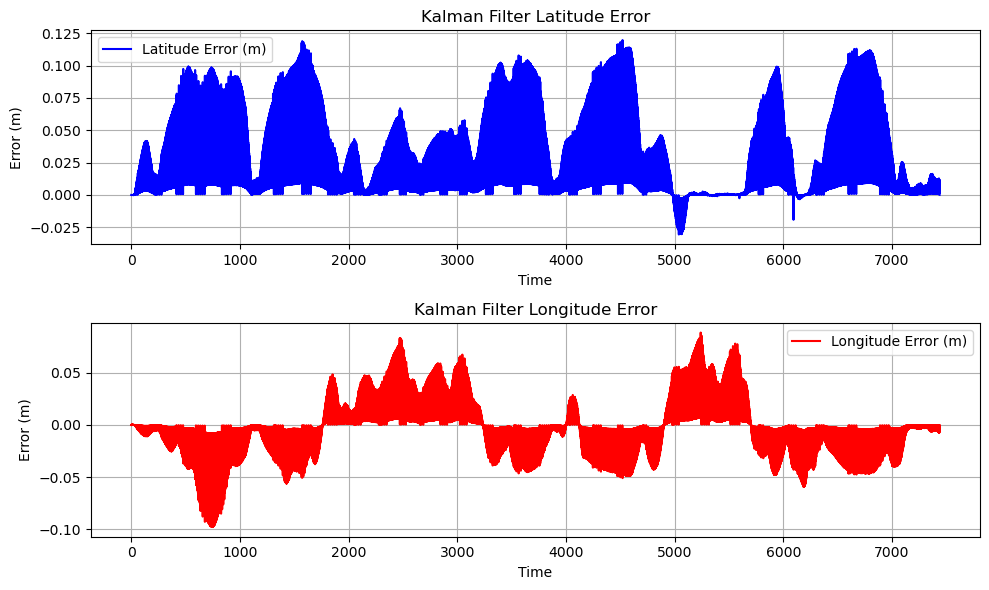

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function to convert latitude and longitude to meters
def lat_lon_to_meters(lat, lon):
    # Approximate conversion factors for latitude and longitude (for small differences)
    lat_to_m = 111320  # Approximately 111 km per degree latitude
    lon_to_m = 111320  # Approximately 111 km per degree longitude at the equator
    if np.isscalar(lat):
        lat_meters = lat * lat_to_m
    else:
        lat_meters = np.array(lat) * lat_to_m
        
    
    if np.isscalar(lon):
        lon_meters = lon * lon_to_m * np.cos(np.radians(lat))
    else:
        lon_meters = np.array(lon) * lon_to_m * np.cos(np.radians(lat))
    return lat_meters, lon_meters
    
# Function to calculate error in meters
def calculate_error(original, estimated):
    return np.array(original) - np.array(estimated)

class KalmanFilter:
    def __init__(self, A, B, H, Q, R, initial_state, initial_covariance):
        self.A = A  # System dynamics matrix
        self.B = B  # Control input matrix
        self.H = H  # Measurement matrix
        self.Q = Q  # Process noise covariance matrix
        self.R = R  # Measurement noise covariance matrix

        self.state = initial_state  # Initial state estimate
        self.covariance = initial_covariance  # Initial covariance estimate

    def predict(self, control_input=None):
        # Predict the next state
        if control_input is not None:
            self.state = np.dot(self.A, self.state) + np.dot(self.B, control_input)
        else:
            self.state = np.dot(self.A, self.state)
        
        # Predict the next covariance
        self.covariance = np.dot(np.dot(self.A, self.covariance), self.A.T) + self.Q

    def update(self, measurement):
        # Kalman gain computation
        S = np.dot(np.dot(self.H, self.covariance), self.H.T) + self.R
        K = np.dot(np.dot(self.covariance, self.H.T), np.linalg.inv(S))

        # Update the state estimate
        innovation = measurement - np.dot(self.H, self.state)
        self.state = self.state + np.dot(K, innovation)

        # Update the covariance estimate
        self.covariance = np.dot((np.eye(self.covariance.shape[0]) - np.dot(K, self.H)), self.covariance)

# Read data from the text file
data = []
with open('/Users/ravitejakunchanapalli/Downloads/sd-maingatetestbed0.05.txt', 'r') as file:
    for line in file:
        values = line.strip().strip('[],').split(',')
        data.append([float(val) for val in values])

# Extract latitude, longitude, and standard deviations
latitudes = [row[0] for row in data]
longitudes = [row[1] for row in data]


# Define system matrices and initial conditions
A = np.eye(2)  # Identity matrix, assuming a simple motion model
B = np.zeros((2, 2))  # No control input
H = np.eye(2)  # Identity matrix as we directly observe position
Q = np.eye(2) * 0.01  # Process noise covariance
R = np.eye(2) * 0.001  # Measurement noise covariance
initial_state = np.array([latitudes[0], longitudes[0]])  # Initial position
initial_covariance = np.eye(2)  # Initial covariance matrix

# Create Kalman filter object
kf = KalmanFilter(A, B, H, Q, R, initial_state, initial_covariance)

# Lists to store estimated data
estimated_latitudes = []
estimated_longitudes = []

# Perform filtering for each measurement
for latitude, longitude in zip(latitudes, longitudes):
    measurement = np.array([latitude, longitude])
    kf.predict()
    kf.update(measurement)
    
    # Append estimated data
    estimated_latitudes.append(kf.state[0])
    estimated_longitudes.append(kf.state[1])

# Convert original and estimated coordinates to meters
original_latitudes_meters, original_longitudes_meters = lat_lon_to_meters(latitudes, longitudes)
estimated_latitudes_meters, estimated_longitudes_meters = lat_lon_to_meters(estimated_latitudes, estimated_longitudes)



# Write estimated latitudes and longitudes to a file
with open('/Users/ravitejakunchanapalli/Desktop/std_lat_data.txt', 'w') as file:
    for lat, lon in zip(latitudes, estimated_latitudes_meters):
        file.write(f"{lat},\n")

# print(original_latitudes_meters[44],original_latitudes_meters[45])
# print("mod_lat_std_before",np.std(original_latitudes_meters))
# print("mod_lat_std_after",np.std(estimated_latitudes_meters))
        
def overall_moving_std(data, window_size):
    moving_std = []
    for i in range(len(data) - window_size + 1):
        window = data[i:i+window_size]
        std_dev = np.std(window)
        moving_std.append(std_dev)
    return np.mean(moving_std)

# Assuming 'original_latitudes_meters' and 'estimated_latitudes_meters' are your latitude data arrays
# Assuming 'original_longitudes_meters' and 'estimated_longitudes_meters' are your longitude data arrays
window_size = 2

# Calculate overall moving standard deviation for original and estimated latitudes
overall_std_before_lat = overall_moving_std(original_latitudes_meters, window_size)
overall_std_after_lat = overall_moving_std(estimated_latitudes_meters, window_size)

# Calculate overall moving standard deviation for original and estimated longitudes
overall_std_before_lon = overall_moving_std(original_longitudes_meters, window_size)
overall_std_after_lon = overall_moving_std(estimated_longitudes_meters, window_size)

print("MSD Original Latitudes(org_file):", overall_std_before_lat)
print("MSD Modified Latitudes(org_file):", overall_std_after_lat)

print("MSD Original Longitudes(org_file):", overall_std_before_lon)
print("MSD Modified Longitudes(org_file):", overall_std_after_lon)

# Calculate error in meters
lat_error = calculate_error(original_latitudes_meters, estimated_latitudes_meters)
lon_error = calculate_error(original_longitudes_meters, estimated_longitudes_meters)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(lat_error, label='Latitude Error (m)', color='blue')
plt.xlabel('Time')
plt.ylabel('Error (m)')
plt.title('Kalman Filter Latitude Error')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(lon_error, label='Longitude Error (m)', color='red')
plt.xlabel('Time')
plt.ylabel('Error (m)')
plt.title('Kalman Filter Longitude Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
